In [1]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="qwen-2.5-32b")

In [2]:
llm.invoke("sup").content

'Hey there! How can I assist you today?'

In [3]:
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.graph.message import add_messages
from typing import Annotated,Literal,TypedDict
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode

In [4]:
def call_model(state:MessagesState):
    messages=state['messages']
    response=llm.invoke(messages)
    return {"messages":[response]}

In [5]:
workflow=StateGraph(MessagesState)
workflow.add_node("chatbot",call_model)
workflow.add_edge(START,"chatbot")
workflow.add_edge("chatbot",END)
app=workflow.compile()

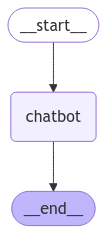

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
input={"messages":["hi, my name is rishabh,give me one important tip to get job in IT"]}
app.invoke(input)

{'messages': [HumanMessage(content='hi, my name is rishabh,give me one important tip to get job in IT', additional_kwargs={}, response_metadata={}, id='92fac167-5e7d-4441-b870-f21ea49f332f'),
  AIMessage(content="Hello Rishabh! An important tip for getting a job in the IT sector is to build a strong foundation in your technical skills and stay updated with the latest technologies. This can involve learning programming languages, frameworks, and tools relevant to the field you're interested in, such as software development, data science, cybersecurity, or cloud computing. Additionally, working on projects or contributing to open-source projects can significantly enhance your profile, demonstrating practical experience and a proactive approach to learning and problem-solving.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 99, 'prompt_tokens': 48, 'total_tokens': 147, 'completion_time': 0.495, 'prompt_time': 0.004622593, 'queue_time': 0.053930396, 'total_t

In [8]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

Output from chatbot Node
_______
{'messages': [AIMessage(content="Hello Rishabh! An important tip for getting a job in IT is to build a strong portfolio of projects that showcase your skills and problem-solving capabilities. Employers in the IT sector value hands-on experience and practical knowledge. This can include personal projects, open-source contributions, or internships where you've applied your technical skills. A portfolio not only demonstrates your proficiency with specific technologies but also your ability to tackle real-world problems, which is highly valued in the industry.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 95, 'prompt_tokens': 48, 'total_tokens': 143, 'completion_time': 0.475, 'prompt_time': 0.004690072, 'queue_time': 0.047697537, 'total_time': 0.479690072}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-dd0d678d-bb14-43aa-9834-b82e87c0d07c-0', usage_m

In [131]:
# from langchain_core.messages import AnyMessage

# class MessagesState(TypedDict):
#     messages: Annotated[list[AnyMessage], add_messages]

In [9]:
@tool
def search(query:str):
    """this is my custom tool."""
    if "sf" in query.lower() or "san francisco" in query.lower():
        return "It's 60 degrees and foggy."
    return "It's 90 degrees and sunny."

In [10]:
search.invoke("what is a temprature in sf?")

"It's 60 degrees and foggy."

In [11]:
search.invoke("what is a weather in india?")

"It's 90 degrees and sunny."

In [12]:
search

StructuredTool(name='search', description='this is my custom tool.', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x000001FFB8F73640>)

In [13]:
tools=[search]

In [14]:
tool_node=ToolNode(tools)

In [15]:
llm_with_tool=llm.bind_tools(tools)

In [16]:
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm_with_tool.invoke(messages)
    return {"messages": [response]}

In [17]:
response=call_model({"messages": ["hi how are you?"]})

In [18]:
response

{'messages': [AIMessage(content="Hello! I'm an artificial intelligence and don't have feelings, but I'm here and ready to help you. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 165, 'total_tokens': 196, 'completion_time': 0.155, 'prompt_time': 0.010719248, 'queue_time': 0.051058061, 'total_time': 0.165719248}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-8be7a5c5-2384-4942-9967-8ac29dc9b518-0', usage_metadata={'input_tokens': 165, 'output_tokens': 31, 'total_tokens': 196})]}

In [19]:
messages = response['messages']

In [20]:
last_message=messages[-1]

In [21]:
last_message.tool_calls

[]

In [22]:
response=call_model({"messages": ["what is a weather in India?"]})

In [23]:
response

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_jtyj', 'function': {'arguments': '{"query": "weather in India"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 167, 'total_tokens': 188, 'completion_time': 0.105, 'prompt_time': 0.010814547, 'queue_time': 0.049795631, 'total_time': 0.115814547}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-32bb1169-a330-4b2e-af7c-6ec10ee90b3d-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in India'}, 'id': 'call_jtyj', 'type': 'tool_call'}], usage_metadata={'input_tokens': 167, 'output_tokens': 21, 'total_tokens': 188})]}

In [24]:
messages = response['messages']

In [25]:
last_message=messages[-1]

In [26]:
last_message.tool_calls

[{'name': 'search',
  'args': {'query': 'weather in India'},
  'id': 'call_jtyj',
  'type': 'tool_call'}]

In [27]:
def router_function(state:MessagesState)->Literal["tools", END]:
    #print(f"here is a state from should continue {state}")
    messages=state["messages"]
    last_message=messages[-1]
    #print(f"here is a last message from should continue {last_message}")
    if last_message.tool_calls:
        return "tools"
    return END


In [28]:
# Define a new graph
workflow=StateGraph(MessagesState)

workflow.add_node("agent",call_model)
workflow.add_node("tools",tool_node)
workflow.add_edge(START, "agent")
workflow.add_conditional_edges("agent",router_function,{"tools": "tools", END: END})
app = workflow.compile()


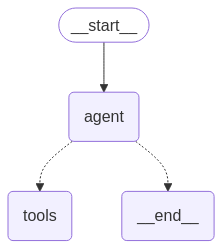

In [29]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [30]:
app.invoke({"messages": ["hi how are you?"]})

{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='3047d404-5b0b-4a95-8df0-ae586d32ead8'),
  AIMessage(content="Hello! I'm just a AI model, so I don't have feelings, but I'm ready and eager to help you. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 34, 'prompt_tokens': 165, 'total_tokens': 199, 'completion_time': 0.17, 'prompt_time': 0.010688988, 'queue_time': 0.050152120999999994, 'total_time': 0.180688988}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-b80d3212-b7fc-465c-bf20-024d781e1e02-0', usage_metadata={'input_tokens': 165, 'output_tokens': 34, 'total_tokens': 199})]}

In [31]:
app.invoke({"messages": ["what is the weather in sf"]})

{'messages': [HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='6c1e5b10-3837-4292-996a-775b8a683e74'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_w4pp', 'function': {'arguments': '{"query": "weather in San Francisco"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 71, 'prompt_tokens': 166, 'total_tokens': 237, 'completion_time': 0.355, 'prompt_time': 0.010801987, 'queue_time': 0.049496632, 'total_time': 0.365801987}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-3e5dd088-3d19-412b-90f0-67985bf416fc-0', tool_calls=[{'name': 'search', 'args': {'query': 'weather in San Francisco'}, 'id': 'call_w4pp', 'type': 'tool_call'}], usage_metadata={'input_tokens': 166, 'output_tokens': 71, 'total_tokens': 237}),
  ToolMessage(content="It's 60 degrees and foggy.", name='search', id='96323932-

In [32]:
workflow.add_edge("tools","agent")

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [33]:
app = workflow.compile()

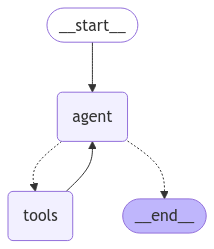

In [34]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [35]:
for output in app.stream({"messages": ["what is the weather in sf"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from agent
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_7maq', 'function': {'arguments': '{"query": "current weather in San Francisco"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 158, 'prompt_tokens': 166, 'total_tokens': 324, 'completion_time': 0.79, 'prompt_time': 0.010889608, 'queue_time': 0.053600647999999994, 'total_time': 0.800889608}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-ec7b0869-82cd-450c-971b-043b064edfaa-0', tool_calls=[{'name': 'search', 'args': {'query': 'current weather in San Francisco'}, 'id': 'call_7maq', 'type': 'tool_call'}], usage_metadata={'input_tokens': 166, 'output_tokens': 158, 'total_tokens': 324})]}


here is output from tools
_______
{'messages': [ToolMessage(content="It's 60 degrees and foggy.", name='search', id='64dcc62d-68c5-43c6-839f-ea7d6acf16e8', t

In [36]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()

In [37]:
# Define a new graph
workflow3=StateGraph(MessagesState)

workflow3.add_node("agent",call_model)
workflow3.add_node("tools",tool_node)
workflow3.add_edge(START,"agent")
workflow3.add_conditional_edges("agent",router_function,{"tools":"tools",END:END})
workflow3.add_edge("tools", 'agent')

In [38]:
app3=workflow3.compile(checkpointer=memory)

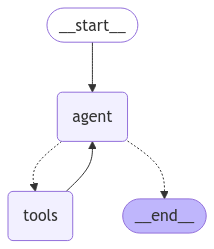

In [39]:
from IPython.display import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [40]:
config={"configurable":{"thread_id":"1"}}
events = app3.stream(
    {"messages": ["Hi there! My name is Sunny."]}, config, stream_mode="values"
)

In [41]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! My name is Sunny.
================================== Ai Message ==================================

Hello, Sunny! It's nice to meet you. How can I assist you today?


In [42]:
events = app3.stream(
    {"messages": ["can you tell me what was my name?"]}, config, stream_mode="values"
)

In [43]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

can you tell me what was my name?
================================== Ai Message ==================================

Your name is Sunny.


In [44]:
memory.get(config)

{'v': 1,
 'ts': '2025-03-16T03:28:59.202311+00:00',
 'id': '1f00216c-c80e-6e4a-8004-0bb2f2f57b72',
 'channel_values': {'messages': [HumanMessage(content='Hi there! My name is Sunny.', additional_kwargs={}, response_metadata={}, id='9a255132-7e8a-4aa7-983b-df7c87004ef2'),
   AIMessage(content="Hello, Sunny! It's nice to meet you. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 168, 'total_tokens': 187, 'completion_time': 0.095, 'prompt_time': 0.010888187, 'queue_time': 0.050717972, 'total_time': 0.105888187}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-b57e65bc-0444-4ad5-8fe3-771d381cf0b2-0', usage_metadata={'input_tokens': 168, 'output_tokens': 19, 'total_tokens': 187}),
   HumanMessage(content='can you tell me what was my name?', additional_kwargs={}, response_metadata={}, id='30864948-4db5-4038-bdbd-9e781aa59f5e'),
   AIMessage(